<a href="https://colab.research.google.com/github/moduluz/IPL-Score-Prediction/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('ipl.csv')

In [23]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [24]:
df.shape


(76014, 15)

In [25]:
df.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


In [26]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [27]:
df.columns


Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [28]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [29]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [30]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [31]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [32]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [33]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [34]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [35]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [36]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [37]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [39]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns


Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [40]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [41]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [42]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [43]:

# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred_lr = linear_regressor.predict(X_test)

In [45]:

# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193299
Mean Squared Error (MSE): 251.00792310417438
Root Mean Squared Error (RMSE): 15.843229566732106


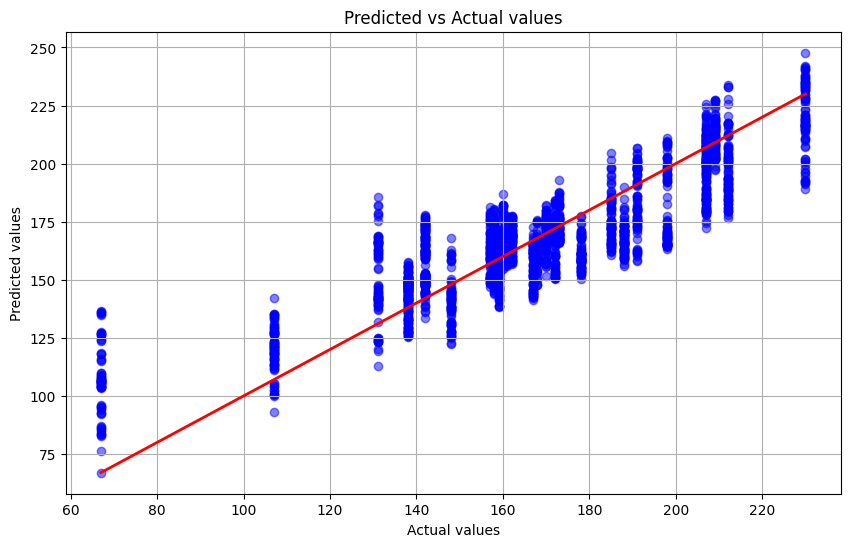

In [46]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.grid(True)
plt.show()


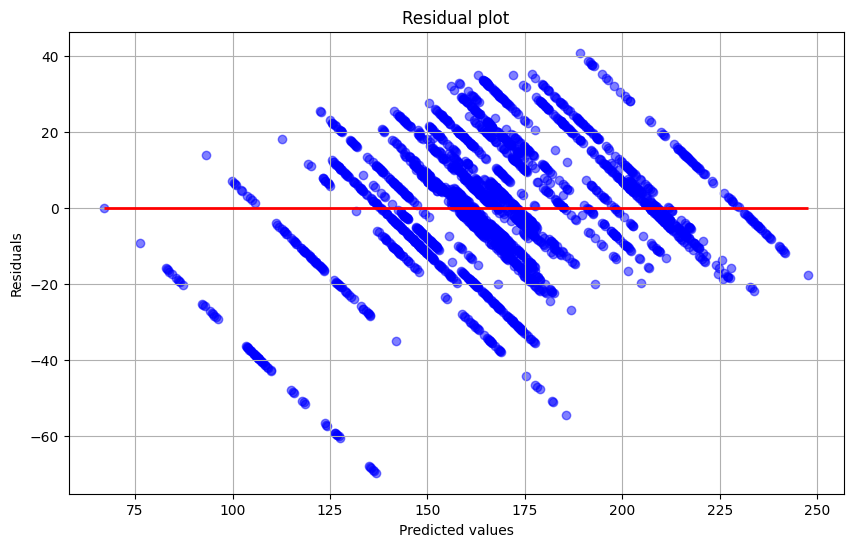

In [47]:
# Calculate residuals
residuals = y_test - y_pred_lr

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=min(y_pred_lr), xmax=max(y_pred_lr), color='red', linewidth=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.grid(True)
plt.show()


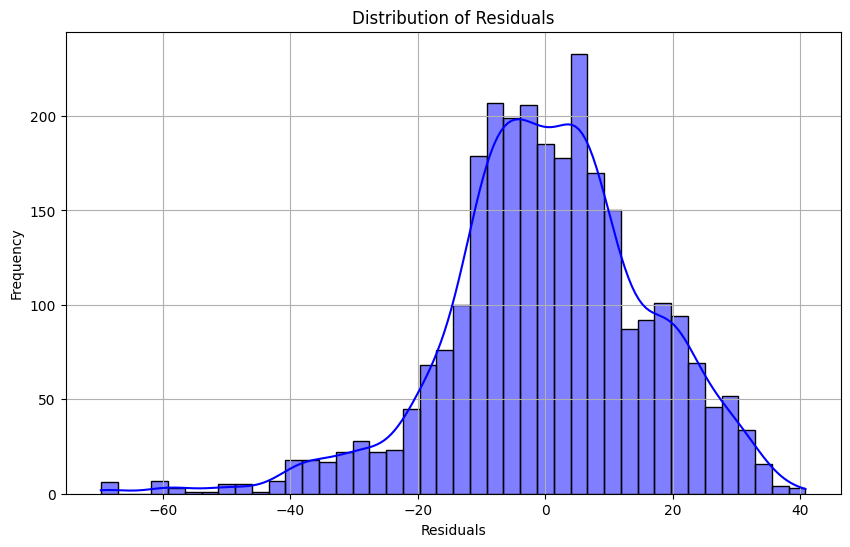

In [48]:
import seaborn as sns

# Distribution plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assume you already have X_train, X_test, y_train, y_test as defined earlier.

# Create and fit the model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_mlr = linear_regressor.predict(X_test)

# Evaluate the model
print("---- Multiple Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_mlr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_mlr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_mlr)))


---- Multiple Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193299
Mean Squared Error (MSE): 251.00792310417438
Root Mean Squared Error (RMSE): 15.843229566732106


CLUSTERING ANALYSIS

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

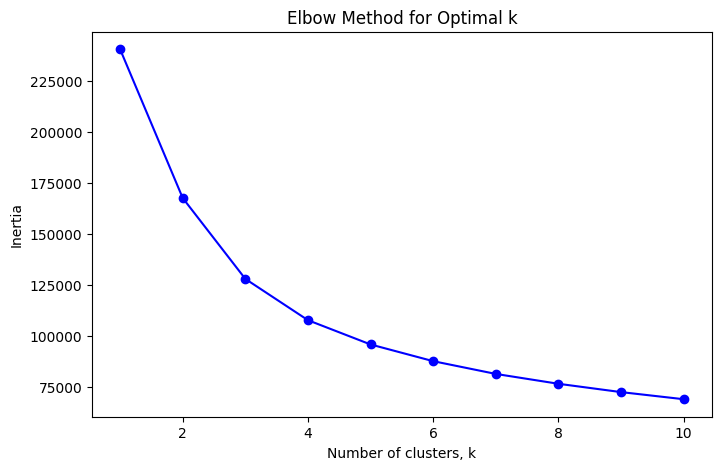


Cluster Analysis Summary:
          total                     runs wickets runs_last_5
           mean  min  max  count    mean    mean        mean
Cluster                                                     
0        137.59   67  192  10970   62.78    3.21       29.35
1        177.12  106  246  12303   70.88    1.31       40.21
2        144.69   67  218   7488  121.06    5.77       35.44
3        184.39  111  246   9347  143.57    2.95       51.11


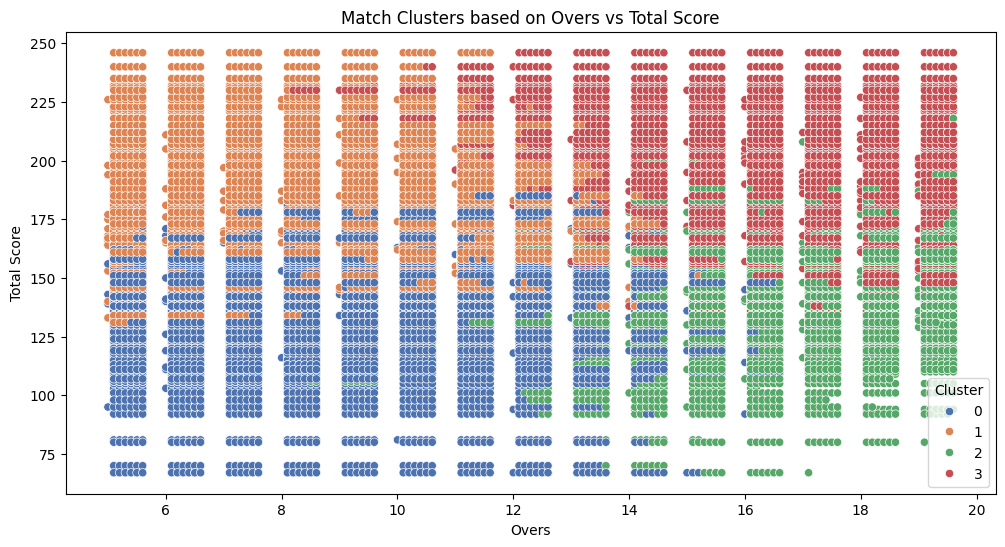

In [71]:


# Step 2: Select relevant features for clustering
cluster_features = ['overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']
X_cluster = df[cluster_features].copy()

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Step 4: Determine the optimal number of clusters using the elbow method
inertias = []
K = range(1, 11)  # Test between 1 and 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 5: Apply K-Means clustering with the chosen number of clusters
# Choose k based on the elbow plot (e.g., k=4 if elbow appears at 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 6: Add the cluster labels to the original data
X_cluster['Cluster'] = cluster_labels

# Step 7: Analyze clusters
cluster_analysis = X_cluster.groupby('Cluster').agg({
    'total': ['mean', 'min', 'max', 'count'],
    'runs': 'mean',
    'wickets': 'mean',
    'runs_last_5': 'mean'
}).round(2)

print("\nCluster Analysis Summary:")
print(cluster_analysis)

# Step 8: Visualize clusters based on 'overs' vs 'total'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X_cluster, x='overs', y='total', hue='Cluster', palette='deep')
plt.title('Match Clusters based on Overs vs Total Score')
plt.xlabel('Overs')
plt.ylabel('Total Score')
plt.legend(title='Cluster')
plt.show()

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Assuming y_test and y_pred_logistic are for a multiclass problem

precision = precision_score(y_test, y_pred_logistic, average='weighted')
recall = recall_score(y_test, y_pred_logistic, average='weighted')
f1 = f1_score(y_test, y_pred_logistic, average='weighted')

print("---- Classification Performance Metrics (Multiclass) ----")

print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1-Score (Weighted):", f1)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_pred_logistic' is not defined

In [53]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains true labels and y_pred_logistic contains predicted labels
accuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy)


NameError: name 'y_pred_logistic' is not defined

**RANDOM** **FOREST**

In [ ]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_regressor = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='squared_error',  # Replaced 'mse' with 'squared_error'
    max_depth=None,
    max_features='sqrt',  # Changed 'auto' to 'sqrt'
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

random_regressor.fit(X_train, y_train)


In [ ]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [ ]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))



**ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Use 'estimator' instead of 'base_estimator'
adb_regressor = AdaBoostRegressor(estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

# Initialize LinearRegression without the deprecated 'normalize' parameter
linear_regressor = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

# Initialize AdaBoostRegressor with LinearRegression as the base estimator
adb_regressor = AdaBoostRegressor(
    estimator=linear_regressor,
    learning_rate=1.0,
    loss='linear',  # 'linear' is the only available option for loss in AdaBoostRegressor
    n_estimators=100,
    random_state=None
)

adb_regressor.fit(X_train, y_train)


In [ ]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [ ]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

**PREDICTIONS**

• Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)

• Model tested on data from IPL Season 10 ie: (2017)

• Model predicts on data from IPL Seasons 11 to 12 ie: (2018 to 2019)

In [ ]:
import numpy as np

def one_hot_encode_team(team_name):
    """Helper function to one-hot encode the team."""
    teams = [
        'Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab',
        'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
        'Royal Challengers Bangalore', 'Sunrisers Hyderabad'
    ]
    return [1 if team == team_name else 0 for team in teams]

def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    # Create the feature array
    temp_array = one_hot_encode_team(batting_team) + one_hot_encode_team(bowling_team)

    # Add numeric features
    temp_array += [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

    # Convert into numpy array
    temp_array = np.array([temp_array])

    # Prediction using the trained AdaBoost model
    predicted_score = adb_regressor.predict(temp_array)[0]

    return int(predicted_score)

# Example usage
final_score = predict_score(
    batting_team='Kolkata Knight Riders',
    bowling_team='Delhi Daredevils',
    overs=9.2,
    runs=79,
    wickets=2,
    runs_in_prev_5=60,
    wickets_in_prev_5=1
)

print("The final predicted score (range): {} to {}".format(final_score - 10, final_score + 5))


Prediction 1
• Date: 16th April 2018
• IPL : Season 11
• Match number: 13
• Teams: Kolkata Knight Riders vs. Delhi Daredevils
• First Innings final score: 200/9

In [ ]:
final_score = predict_score(
    batting_team='Kolkata Knight Riders',
    bowling_team='Delhi Daredevils',
    overs=9.2,
    runs=79,
    wickets=2,
    runs_in_prev_5=60,
    wickets_in_prev_5=1
)

print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


Prediction 2
• Date: 7th May 2018
• IPL : Season 11
• Match number: 39
• Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore
• First Innings final score: 146/10

In [ ]:

final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))